Firstly, use XGBoost regressor to train the data and obtain the features importance.(Between Independance and dependant variable. )
Dataset ready for split
train&test_size: Train= 129  Test= 1
Train test split finish
Mean squared error (MSE): 0.00
Coefficient of determination (R^2): 1.00
Mean squared error (MSE): 0.00
Coefficient of determination (R^2): nan


C:\Users\wjchan\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


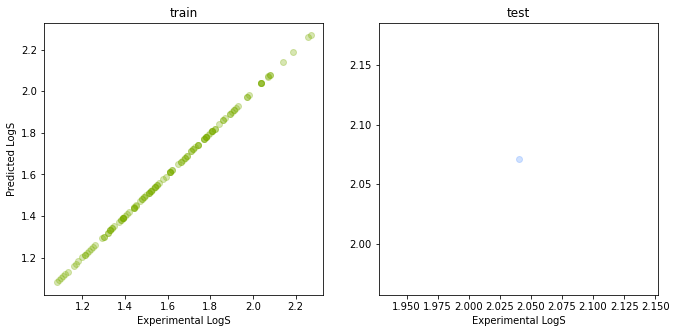

Month 0.8673544526100159
HA_Harvested 0.03187447786331177
Year 0.030928529798984528
Working_days 0.015521707013249397
Precipitation 0.014750332571566105
Average_Temp 0.014256635680794716
Min_Temp 0.009457585401833057
SoilMoisture 0.008253946900367737
Max_Temp 0.007602251134812832
(129, 9)


<AxesSubplot:>

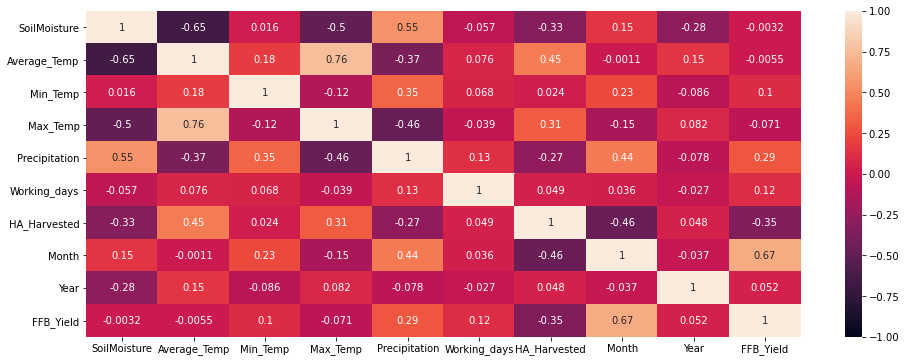

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

dataset = pd.read_csv("palm_ffb.csv") 
print("Firstly, use XGBoost regressor to train the data and obtain the features importance.(Between Independance and dependant variable. )")
#Create Month and Year columns while drop data column
Month = []
for i in range(len(dataset)):
    Month.append(int(dataset['Date'][i][3:5]))

Year = []
for i in range(len(dataset)):
    Year.append(int(dataset['Date'][i][6:]))

dataset['Month'] = Month
dataset['Year'] = Year
dataset = dataset.drop(columns=['Date'])

#Convert categorical column into numerous numerical columns, similar with one hot encoding
col_start = 0
tar_col = ["FFB_Yield"]

    
cols = list(dataset.columns.values) #list that contained all columns name

for i in tar_col:
    dataset.insert(len(cols),"test",dataset[i])
    dataset=dataset.drop(columns=[i]).rename(columns={"test":i}) #move the target column to the back of all columns

dataset_ori=dataset
print ('Dataset ready for split')

#instantiating the class and splitting
dataset_f = pd.DataFrame(dataset.iloc[: ,col_start:-len(tar_col)]) #set final dataset with columns name
X = np.array(pd.DataFrame(dataset.iloc[: ,col_start:-len(tar_col)])) #features
y = np.array(pd.DataFrame(dataset.iloc[: , -len(tar_col):])) #target


train_size = round(len(dataset.to_numpy())*0.99) #set training size to 99%
print("train&test_size: Train=", train_size, " Test=", len(dataset.to_numpy())-train_size)

X_train = X[:train_size,:]
y_train = y[:train_size,:]
X_test = X[train_size:,:]
y_test = y[train_size:,:]

print ('Train test split finish')

#training start here
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.multioutput import MultiOutputRegressor

from xgboost import XGBRegressor
#Define the estimator
estimator = XGBRegressor(objective = 'reg:squarederror', random_state = np.random.seed(42))
# Define the model
model1 = estimator.fit(X_train, y_train)

# Evaluate accuracy
from sklearn.metrics import mean_squared_error, r2_score
#X train evaluation
Y_pred_train = model1.predict(X_train)
print('Mean squared error (MSE): %.2f'% mean_squared_error(y_train, Y_pred_train))
print('Coefficient of determination (R^2): %.2f'% r2_score(y_train, Y_pred_train))

#X test evaluation
Y_pred_test = model1.predict(X_test)
print('Mean squared error (MSE): %.2f'% mean_squared_error(y_test, Y_pred_test))
print('Coefficient of determination (R^2): %.2f'% r2_score(y_test, Y_pred_test))


plt.figure(figsize=(11,5))

# 1 row, 2 column, plot 1
plt.subplot(1, 2, 1)
plt.scatter(x=y_train, y=Y_pred_train, c="#7CAE00", alpha=0.3)
plt.title('train')
plt.ylabel('Predicted LogS')
plt.xlabel('Experimental LogS')

# 1 row, 2 column, plot 2
plt.subplot(1, 2, 2)
plt.scatter(x=y_test, y=Y_pred_test, c="#619CFF", alpha=0.3)
plt.title('test')
plt.xlabel('Experimental LogS')

plt.show()



for index, val in feat_imp.iteritems():
    print (index, val) #features and it's score
print (X_train.shape)   

plt.figure(figsize=(16, 6))
sns.heatmap(dataset.corr(), vmin=-1, vmax=1, annot=True)


Features importances in %:
Month 0.8673544526100159
HA_Harvested 0.03187447786331177
Year 0.030928529798984528
Working_days 0.015521707013249397
Precipitation 0.014750332571566105
Average_Temp 0.014256635680794716
Min_Temp 0.009457585401833057
SoilMoisture 0.008253946900367737
Max_Temp 0.007602251134812832


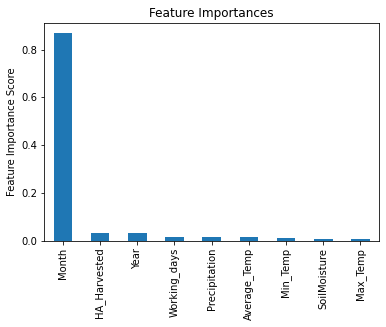

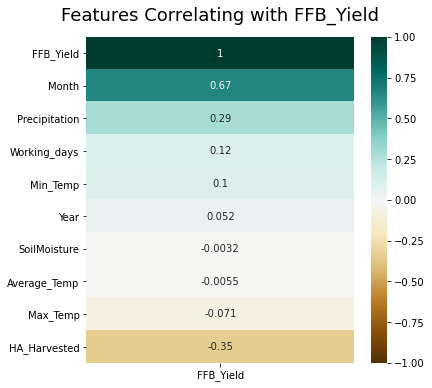

In Summary, we noticed that Month have a significant impact on the FFB_Yield, follow by HA_Harvested and Precipitation.


In [38]:

print('\nFeatures importances in %:')
for index, val in feat_imp.iteritems():
    print (index, val)
    
#feature selection/importances
predictors = [x for x in dataset_f.columns if x not in [tar_col]]
feat_imp = pd.Series(model1.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')
plt.show
plt.figure(figsize=(6, 6))
#sns.heatmap(dataset.corr(), vmin=-1, vmax=1, annot=True)

#print(dataset.corr())
heatmap = sns.heatmap(dataset.corr()[['FFB_Yield']].sort_values(by='FFB_Yield', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with FFB_Yield', fontdict={'fontsize':18}, pad=16)
plt.show()

print('In Summary, we noticed that Month have a significant impact on the FFB_Yield, follow by HA_Harvested and Precipitation.')